### **Homework 2-5**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_circles

train_input, train_label = make_circles(n_samples = 150, factor = 0.6, noise = 0.1, random_state = 5)

train_data = pd.DataFrame(train_input, columns=['X', 'Y'])
train_data['label'] = np.array(train_label)

valid_input, valid_label = make_circles(n_samples = 50, factor = 0.6, noise = 0.1, random_state = 8)

valid_data = pd.DataFrame(valid_input, columns=['X', 'Y'])
valid_data['label'] = np.array(valid_label)

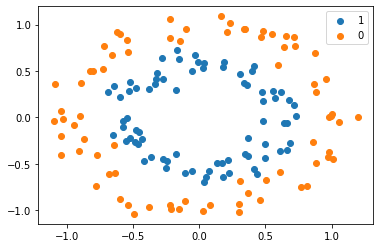

In [ ]:
train_one = train_data[train_data['label'].isin([1])]
train_zero = train_data[train_data['label'].isin([0])]

plt.scatter(train_one['X'], train_one['Y'], label = '1')
plt.scatter(train_zero['X'], train_zero['Y'], label = '0')

plt.legend()
plt.show()

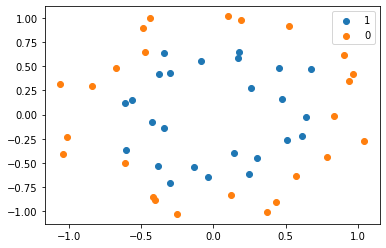

In [ ]:
valid_one = valid_data[valid_data['label'].isin([1])]
valid_zero = valid_data[valid_data['label'].isin([0])]

plt.scatter(valid_one['X'], valid_one['Y'], label = '1')
plt.scatter(valid_zero['X'], valid_zero['Y'], label = '0')

plt.legend()
plt.show()

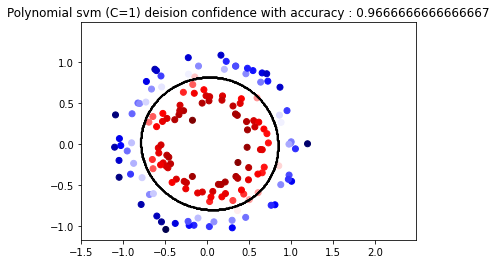

Validation Set Accuracy when C=1 is 0.98.


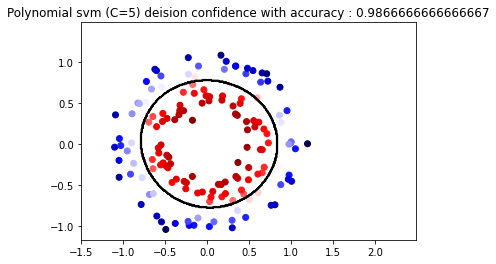

Validation Set Accuracy when C=5 is 0.94.


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


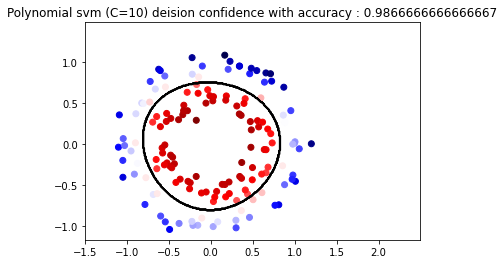

Validation Set Accuracy when C=10 is 0.96.


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


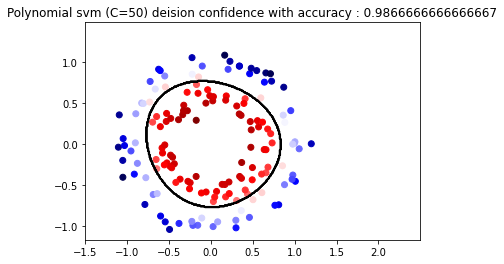

Validation Set Accuracy when C=50 is 0.92.


In [ ]:
from sklearn import svm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

x, y = np.meshgrid(np.arange(-1.5, 2.5, 0.01), np.arange(-1, 1.5, 0.01))

for C in [1, 5, 10, 50]:
  polynomial_svm = Pipeline([("poly_features", PolynomialFeatures(degree = 3)), ('svm_clf', svm.LinearSVC(C = C, loss = 'hinge'))])
  polynomial_svm.fit(train_data[['X', 'Y']], train_data['label'])

  train_data['polynomial svm confidence'] = polynomial_svm.decision_function(train_data[['X', 'Y']])
  score_train = polynomial_svm.score(train_data[['X', 'Y']], train_data['label'])
  score_valid = polynomial_svm.score(valid_data[['X', 'Y']], valid_data['label'])

  Z = polynomial_svm.predict(np.c_[x.ravel(), y.ravel()])
  Z = Z.reshape(x.shape)

  plt.scatter(train_data['X'], train_data['Y'], c = train_data['polynomial svm confidence'], cmap = 'seismic')
  plt.contour(x, y, Z, colors = 'black')
  plt.title(f'Polynomial svm (C={C}) deision confidence with accuracy : {score_train}')
  plt.show()
  print(f"Validation Set Accuracy when C={C} is {score_valid}.")

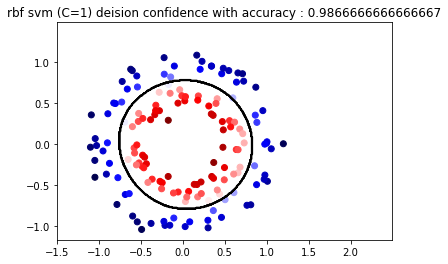

Validation Set Accuracy when C=1 is 0.96.


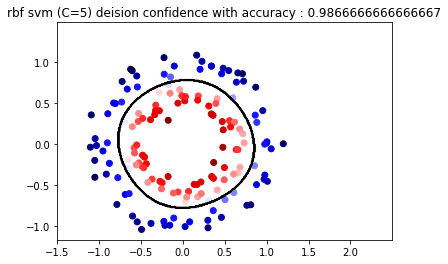

Validation Set Accuracy when C=5 is 0.94.


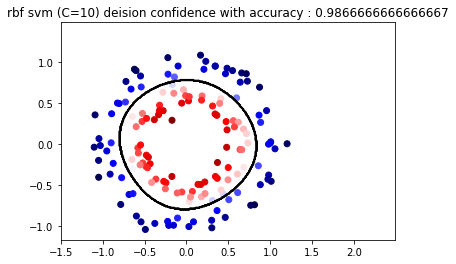

Validation Set Accuracy when C=10 is 0.98.


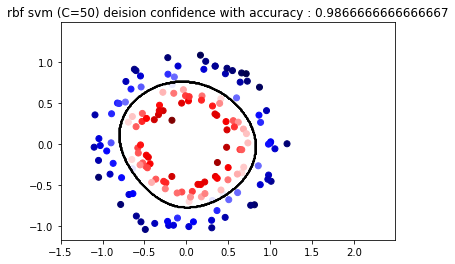

Validation Set Accuracy when C=50 is 0.96.


In [ ]:
for C in [1, 5, 10, 50]:
  rbf_svm = svm.SVC(kernel = 'rbf', coef0 = 1, gamma = 1., C = C)
  rbf_svm.fit(train_data[['X', 'Y']], train_data['label'])

  train_data['rbf svm confidence'] = rbf_svm.decision_function(train_data[['X', 'Y']])
  score_train = rbf_svm.score(train_data[['X', 'Y']], train_data['label'])
  score_valid = rbf_svm.score(valid_data[['X', 'Y']], valid_data['label'])

  Z = rbf_svm.predict(np.c_[x.ravel(), y.ravel()])
  Z = Z.reshape(x.shape)

  plt.scatter(train_data['X'], train_data['Y'], c = train_data['rbf svm confidence'], cmap = 'seismic')
  plt.contour(x, y, Z, colors = 'black')
  plt.title(f'rbf svm (C={C}) deision confidence with accuracy : {score_train}')
  plt.show()
  print(f"Validation Set Accuracy when C={C} is {score_valid}.")